### Business Problem

A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans. 

We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

### Business Constraint: 
Note that it is worse to state an applicant as a low credit risk when they are actually a high risk, than it is to state an applicant to be a high credit risk when they aren’t.

In [396]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [397]:
applicant=pd.read_csv('data/applicant.csv') #loading data
loan=pd.read_csv('data/loan.csv')

In [398]:
data=pd.merge(loan,applicant,on='applicant_id') #join
data.drop(['loan_application_id', 'applicant_id'],axis=1,inplace=True)  #drop

In [399]:
print('no.of data points : {}'.format(len(data)))

no.of data points : 1000


In [400]:
data.columns #features

Index(['Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

In [401]:
print('no.of columns : {}'.format(len(data.columns)))

no.of columns : 25


### Distribution of data points among output classes

data is imbalanced


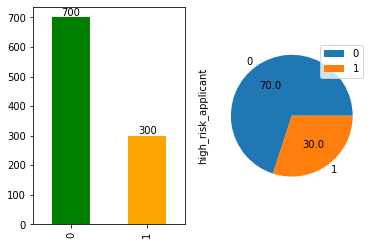

In [402]:
print('data is imbalanced')
plt.subplot(1,2,1)
container=data.high_risk_applicant.value_counts().plot.bar(color=['green','orange'])
plt.bar_label(container.containers[0])
plt.subplot(1,2,2)
data.high_risk_applicant.value_counts().plot.pie(autopct=lambda x:round(x,2))
plt.legend()
plt.show()

In [403]:
numerical_features = [
    'Months_loan_taken_for',
    'Principal_loan_amount',
    'EMI_rate_in_percentage_of_disposable_income',
    'Number_of_existing_loans_at_this_bank',
    'Primary_applicant_age_in_years',
    'Number_of_dependents',
    'Years_at_current_residence',
    'Has_been_employed_for_at_least',
    'Has_been_employed_for_at_most']
categorical_features = [
 'Purpose',
 'Property',
 'Has_coapplicant',
 'Has_guarantor',
 'Other_EMI_plans',
 'Loan_history',
 'Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Telephone',
 'Foreign_worker',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)']

In [404]:
print('numerical features : {}'.format(len(numerical_features)))
print('categorical features : {}'.format(len(categorical_features)))

numerical features : 9
categorical features : 15


In [405]:
#for numerical features
def plot_numeric(data,feature):
    print(feature.center(75,'-'))
    sns.displot(data=data,x=feature,hue='high_risk_applicant',kind='kde')
    plt.grid()
    plt.title('PDF of {}'.format(feature))
    sns.displot(data=data,x=feature,hue='high_risk_applicant',kind='ecdf')
    plt.grid()
    plt.title('CDF of {}'.format(feature))
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.boxplot(data=data,x='high_risk_applicant',y=feature)
    plt.title('BOXPLOT of {}'.format(feature))
    plt.subplot(1,2,2)
    sns.violinplot(data=data,x='high_risk_applicant',y=feature)
    plt.title('VIOLON PLOT of {}'.format(feature))
    plt.show()

In [406]:
def plot_categorical(data,feature):
    print(feature.center(75,'-'))
    plt.figure(figsize=(18,5))
    v=data[feature].value_counts(sort=False)
    con=sns.barplot(v.index,v.values)
    plt.title(feature)
    plt.bar_label(con.containers[0])
    plt.show()
    temp1=data[data['high_risk_applicant']==0][feature].value_counts(sort=False)
    temp2=data[data['high_risk_applicant']==1][feature].value_counts(sort=False)
    temp1=temp1.reindex(index=v.index)
    temp2=temp2.reindex(index=v.index)

    temp3=temp1.values/(temp1.values+temp2.values)
    temp4=temp2.values/(temp1.values+temp2.values)
    plt.figure(figsize=(20,5))
    p=plt.bar(temp1.index,temp4*100,label='high risk applicant',color='orange')
    plt.ylabel('counts')
    plt.bar_label(p,fmt='%.2f')
    p=plt.bar(temp1.index,temp3*100,bottom=temp4*100,label='low risk applicant',color='green')
    plt.ylabel('percentage')
    #plt.bar_label(p)
    #plt.bar(temp2.index,temp2.values,color=['orange'],label='high risk applicant')
    #plt.bar(temp1.index,temp1.values,bottom=temp2.values,color=['green'],label='low risk applicant')
    #plt.ylabel('count')
    plt.legend()
    plt.title(feature)
    plt.show()

---------------------------Months_loan_taken_for---------------------------


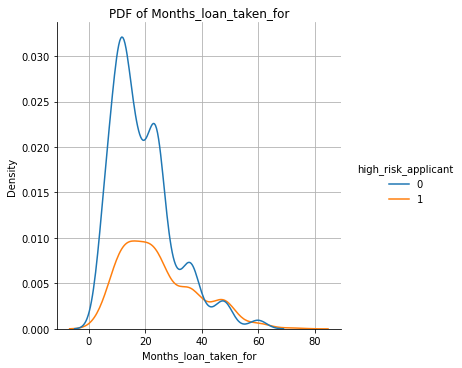

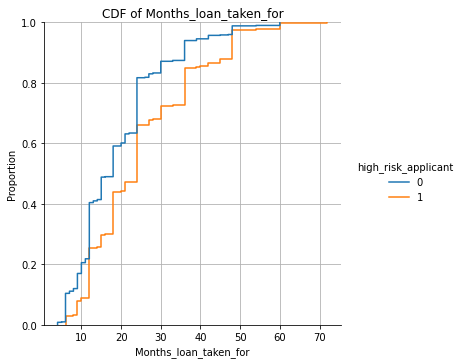

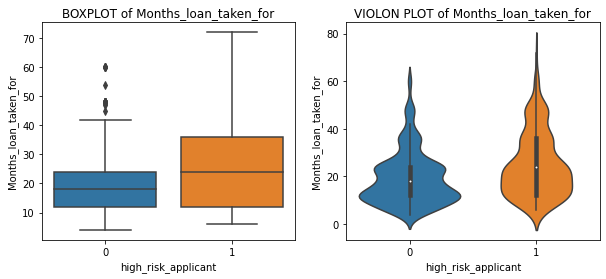

In [407]:
plot_numeric(data,numerical_features[0])

#### Observations:

---> if no.of months loan taken for is large ,then it has high chance that it is high risk applicant

---> by looking at boxplot ,typically months loan taken for >25 ,then it has high chance that it is high risk applicant

In [408]:
data[numerical_features[0]].isna().sum() #no Nan values 

0

---------------------------Principal_loan_amount---------------------------


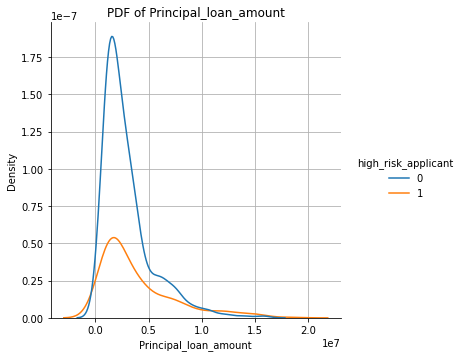

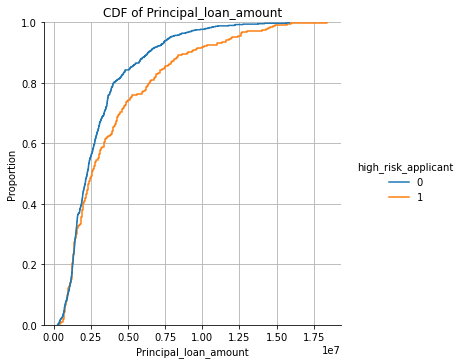

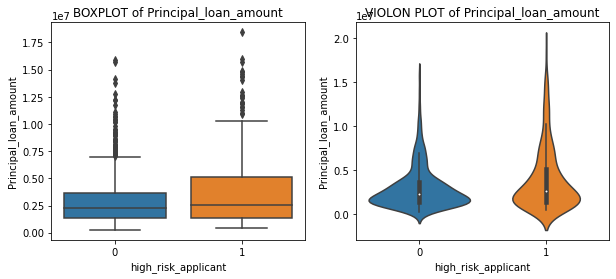

In [409]:
plot_numeric(data,numerical_features[1])

### Observations :
---> if Principal_loan_amount is large ,then it has high chance that it is high risk applicant 

---> typically ,need to be carefull when giving loans greater then 50k

In [410]:
data.Principal_loan_amount.isna().sum() #no null values

0

----------------EMI_rate_in_percentage_of_disposable_income----------------


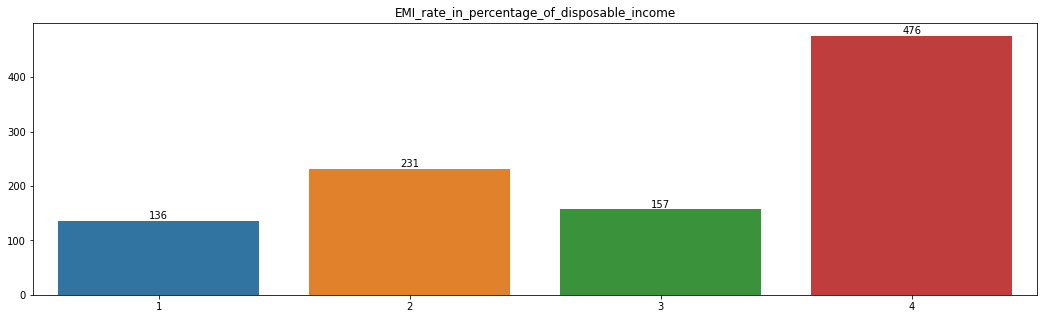

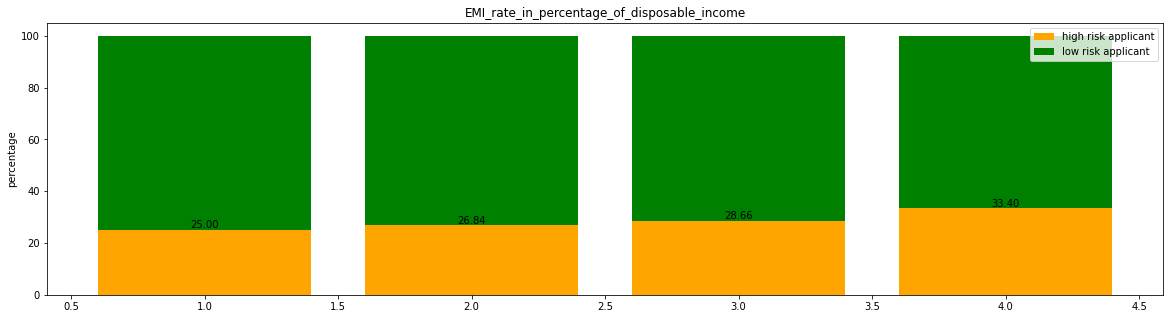

In [411]:
plot_categorical(data,numerical_features[2])

#### observations :
---> more the EMI_rate_in_percentage_of_disposable_income , greater the chance it be high risk applicant

In [412]:
data.EMI_rate_in_percentage_of_disposable_income.isna().sum() #no null values 

0

-------------------Number_of_existing_loans_at_this_bank-------------------


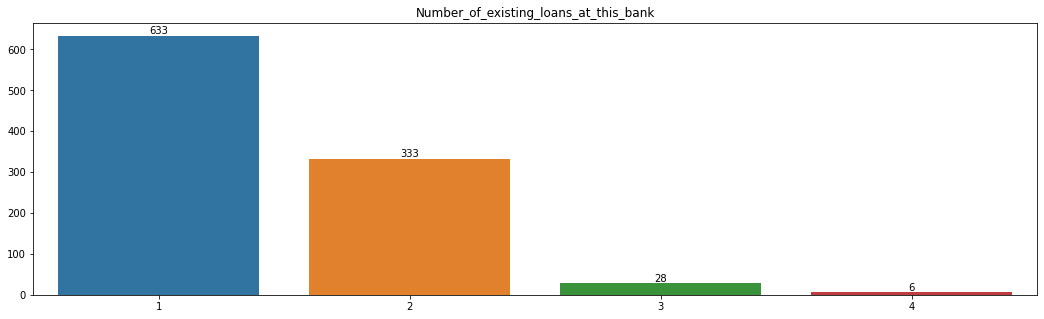

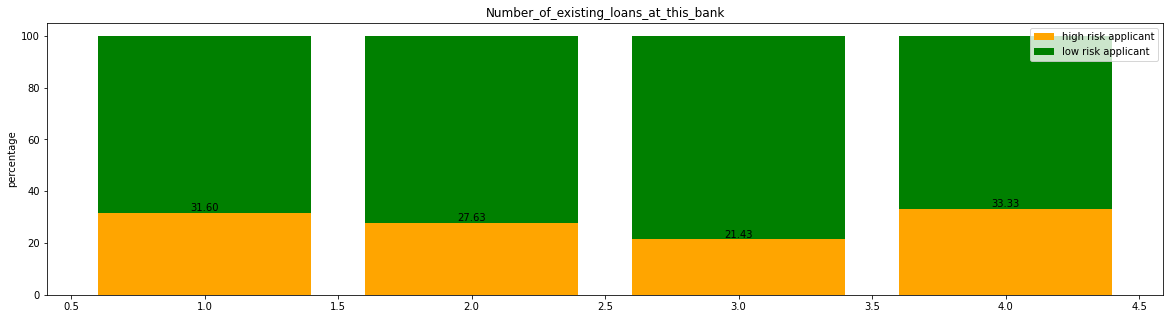

In [413]:
plot_categorical(data,numerical_features[3])

#### observations : 
---> Not much information to detect high risk applicant , because by looking at plot 1 and 4 

In [414]:
data.Number_of_existing_loans_at_this_bank.isna().sum() #no null values

0

-----------------------Primary_applicant_age_in_years----------------------


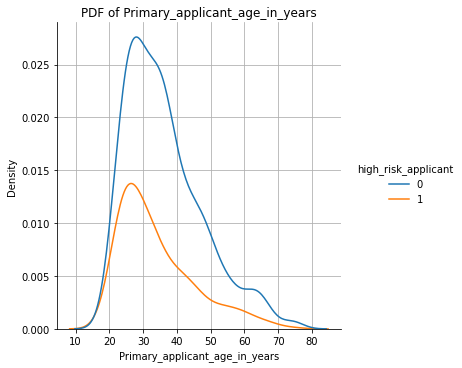

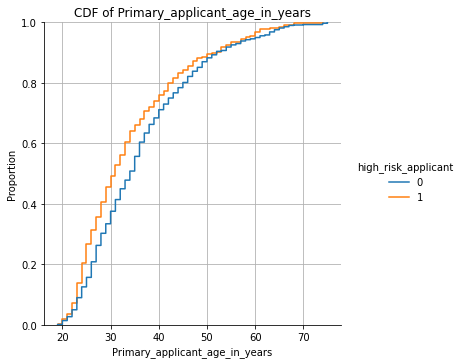

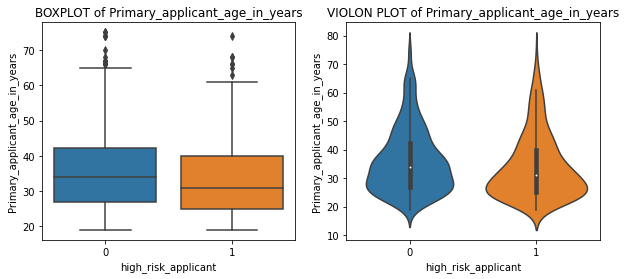

In [415]:
plot_numeric(data,numerical_features[4])

### observations:

---> by looking at boxplot, age between 19-26 has high chance to be high risk applicant

---> also age greater then 40 has less chance to be high risk applicant 

In [416]:
data.Primary_applicant_age_in_years.isna().sum() #no null values

0

----------------------------Number_of_dependents---------------------------


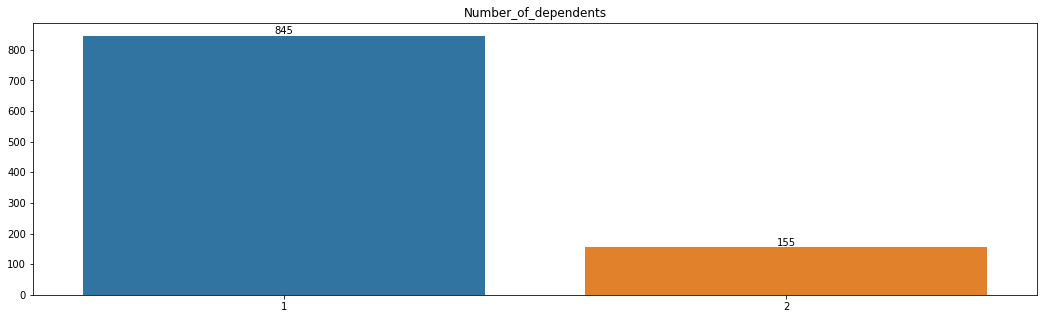

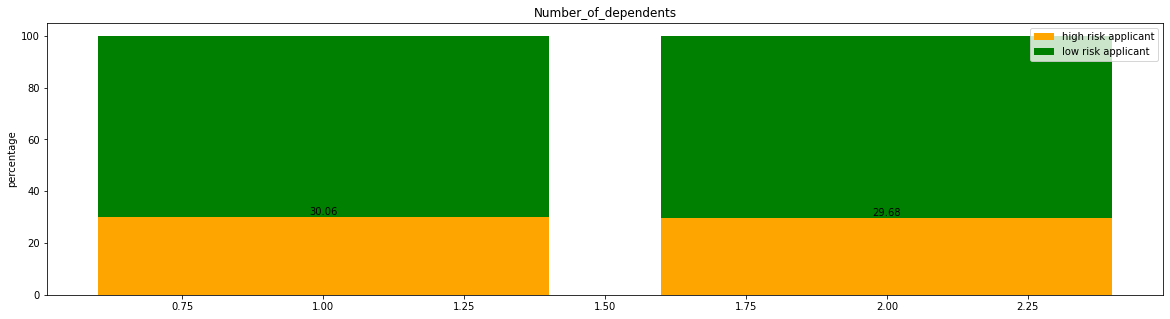

In [417]:
plot_categorical(data,numerical_features[5])

### Observation :

--->  not much informations to detect high risk applicant from appicants

In [418]:
data.Number_of_dependents.isna().sum() #no null values

0

-------------------------Years_at_current_residence------------------------


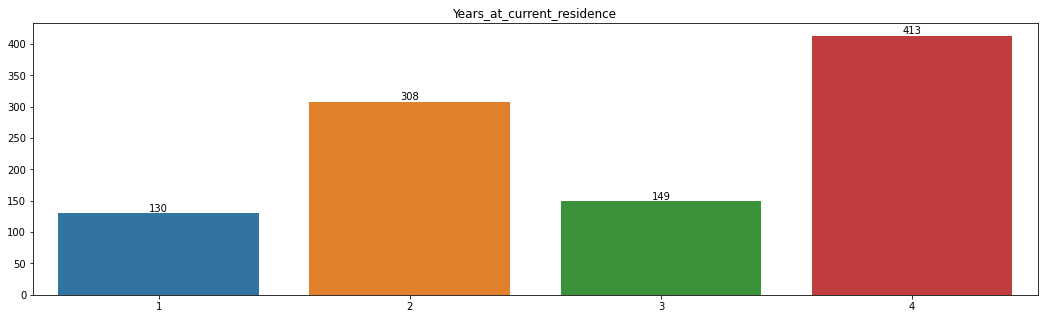

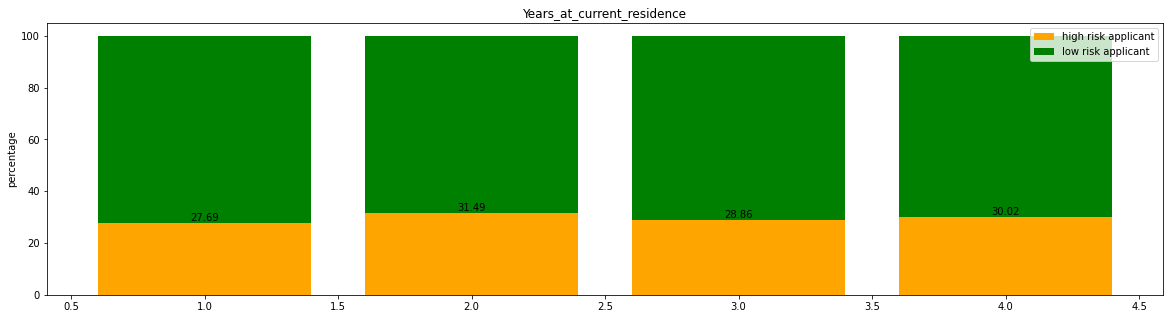

In [419]:
plot_categorical(data,numerical_features[6])

### Observation :

--->  not much informations to detect high risk applicant from appicants

In [420]:
data.Years_at_current_residence.isna().sum()  #no null values

0

In [421]:
print('siva')

siva


-----------------------Has_been_employed_for_at_least----------------------


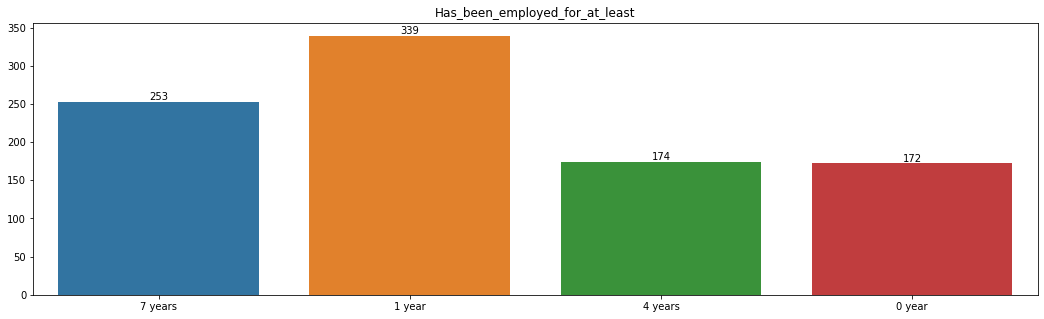

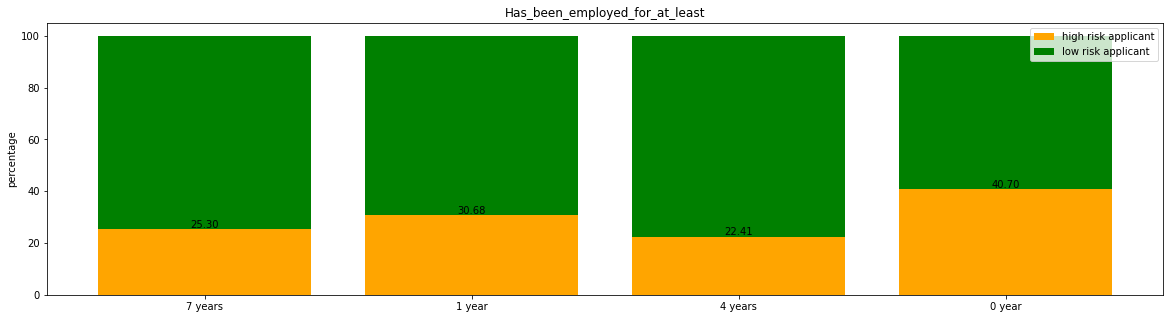

In [422]:
plot_categorical(data,numerical_features[7])

### Observations :

---> Has_been_employed_for_at_least 0 years ,has high chance to be high risk applicant

---> Has_been_employed_for_at_least 1 years , also has high chance to be high risk applicant

In [424]:
print('nan values ',data.Has_been_employed_for_at_least.isna().sum())  #null values are there

nan values  62


-----------------------Has_been_employed_for_at_most-----------------------


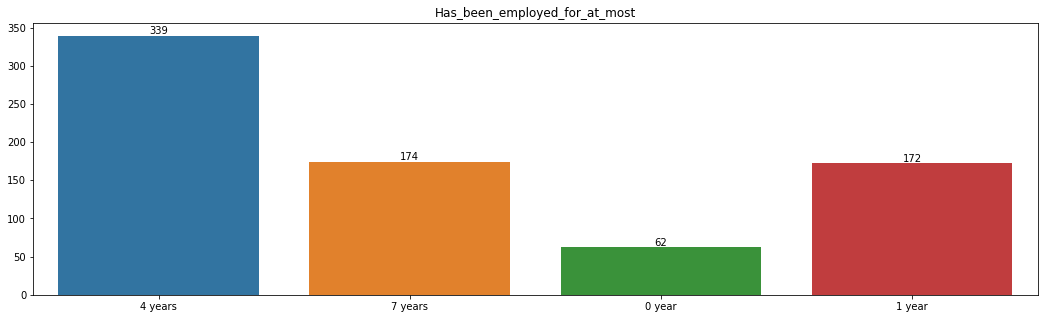

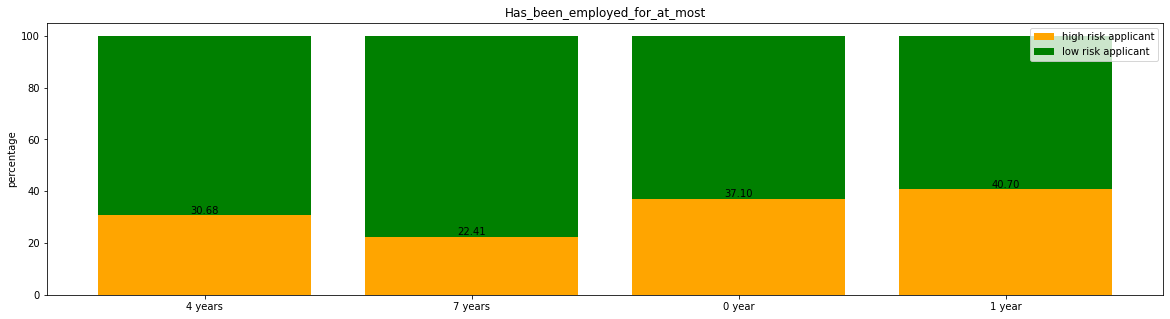

In [361]:
plot_categorical(data,numerical_features[8])

### Observations :

---> Has_been_employed_for_at_most 0 years ,has high chance to be high risk applicant \
---> Has_been_employed_for_at_most 1 years , also has high chance to be high risk applicant \
----> it look like  Has_been_employed_for_at_most increases then chance of high risk applicant decrease


In [427]:
print(data.Has_been_employed_for_at_most.isna().sum()) #null values

253


----------------------------------Purpose----------------------------------


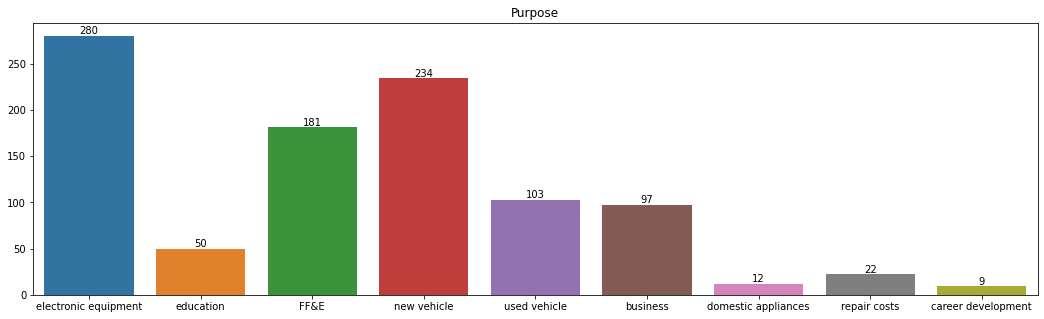

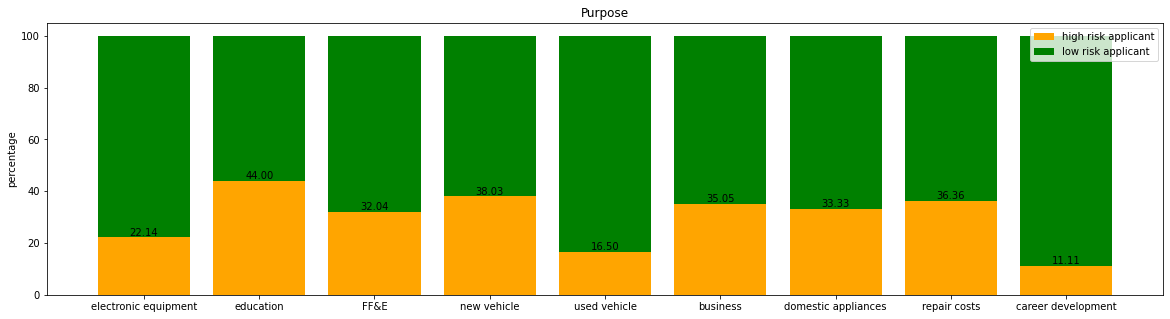

In [428]:
plot_categorical(data,categorical_features[0])

### Observations :

--> education loans has more high risk applicants compared to other categories

--> new vechicle loans also has more high risk applicant compared to other categories

--> career development loans has less high risk applicants(we have less no.of datapoints)

--> elctronic loans has less less risk applicants

In [429]:
data.Purpose.isna().sum()  # null values

12

----------------------------------Property---------------------------------


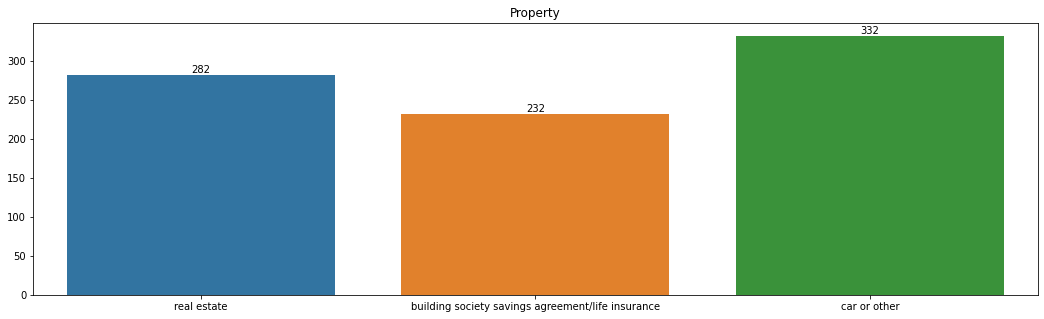

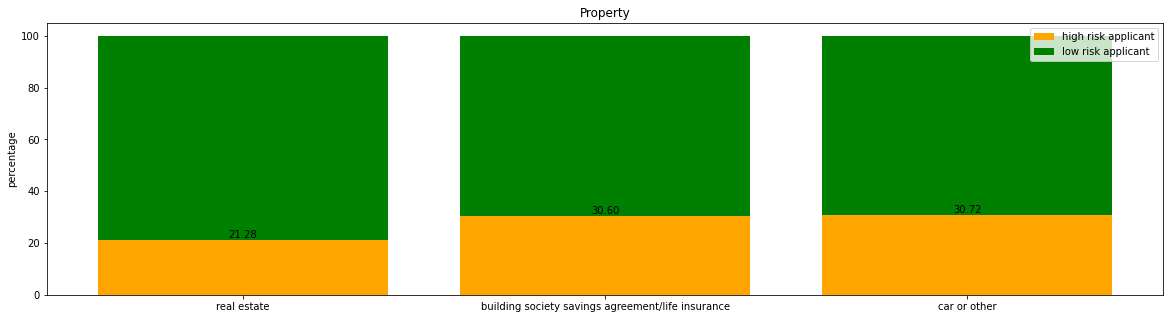

In [430]:
plot_categorical(data,categorical_features[1])

### Observations : 

--> no property(NaN) , has high chance to be high risk applicant 

--> real estate has low chance to be high risk applicant

In [431]:
data.Property.isna().sum()  #null values are there

154

------------------------------Has_coapplicant------------------------------


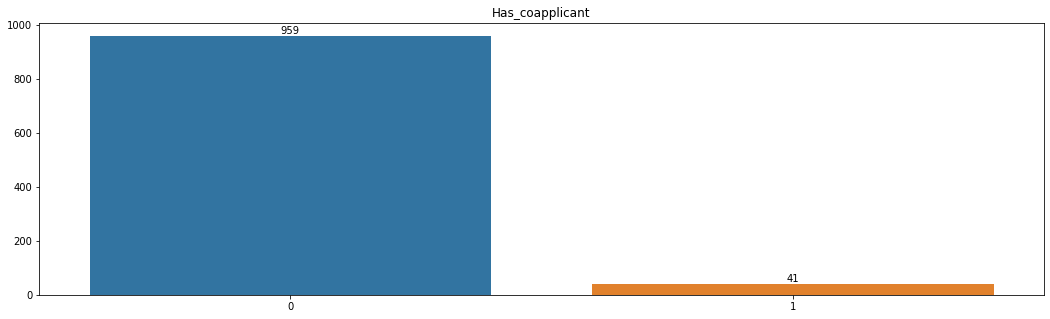

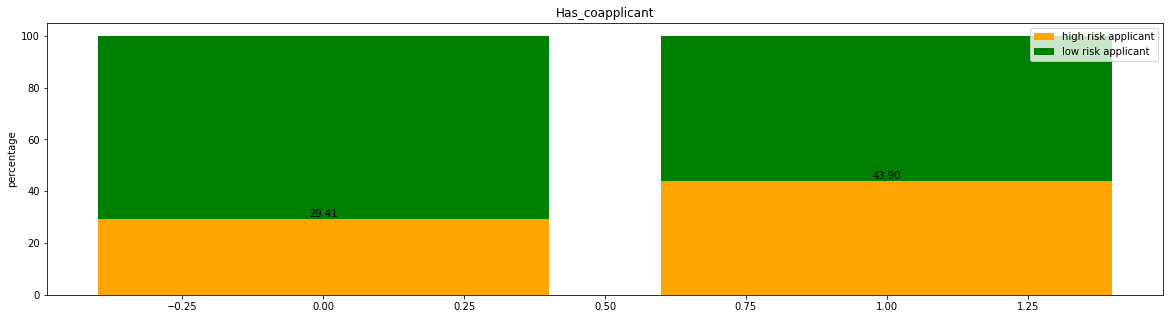

In [432]:
plot_categorical(data,categorical_features[2])

### Observations:

--> its better to has coapplicant , so that high risk applicant chances are less

In [368]:
data.Has_coapplicant.isna().sum()  #no null values

0

-------------------------------Has_guarantor-------------------------------


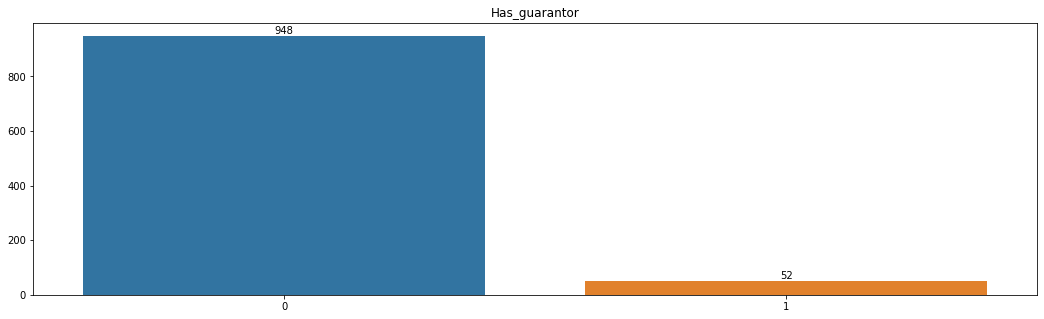

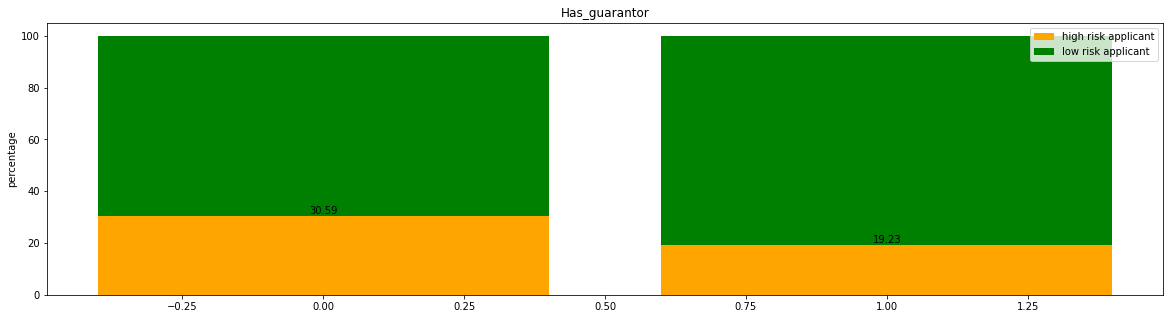

In [369]:
plot_categorical(data,categorical_features[3])

### Observation:

--> its better to has guarantor , so that high risk applicant chances are less

In [435]:
data.Has_guarantor.isna().sum()  #no null values

0

------------------------------Other_EMI_plans------------------------------


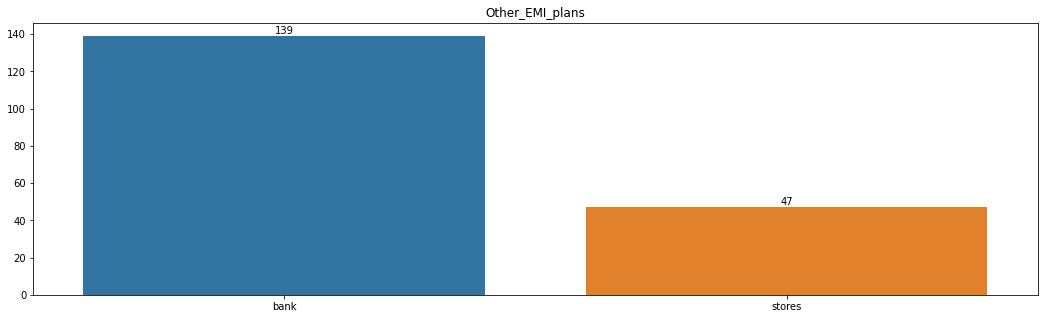

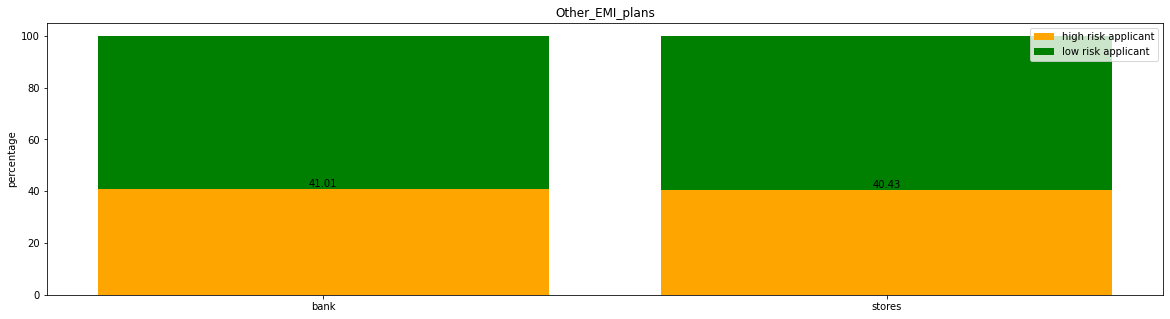

In [436]:
plot_categorical(data,categorical_features[4])

### observation : 
---> not much informations to detect high risk applicant from appicants

In [437]:
data.Other_EMI_plans.isna().sum()  # null values

814

--------------------------------Loan_history-------------------------------


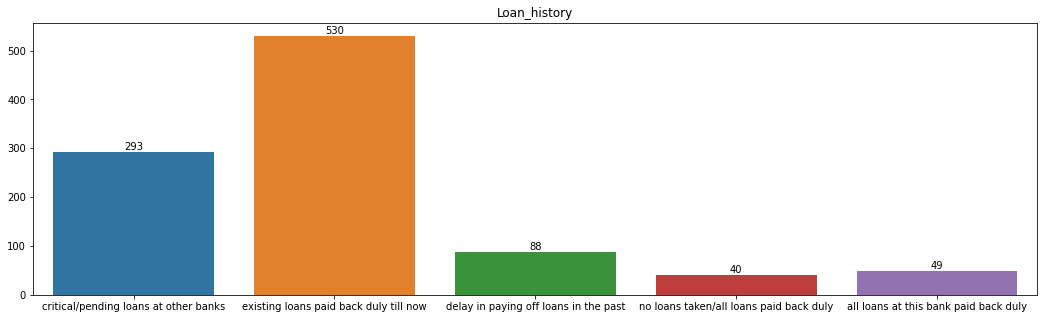

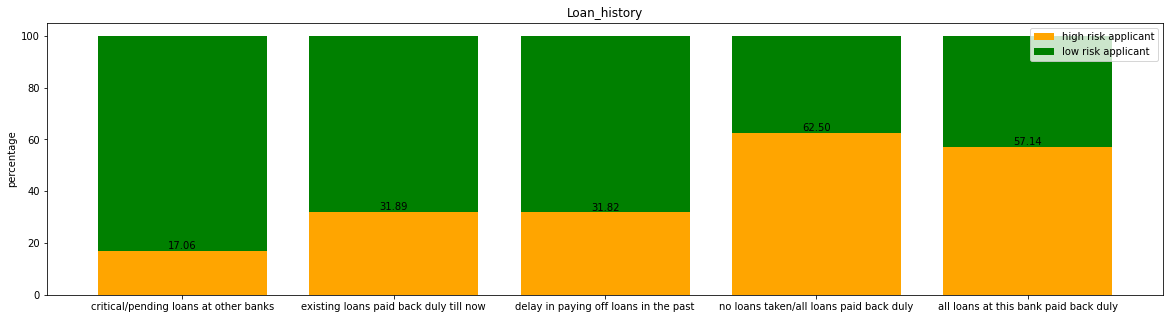

In [439]:
plot_categorical(data,categorical_features[5])

### Observations : 

---> surprisingly , pending loans at other bank has less chance to be high risk applicant

---> also , all loans paid back duly , has high chance to be high risk applicant

---> it look like corrupted data / wrong data

In [440]:
data.Loan_history.isna().sum()  # no null values

0

-----------------------------------Gender----------------------------------


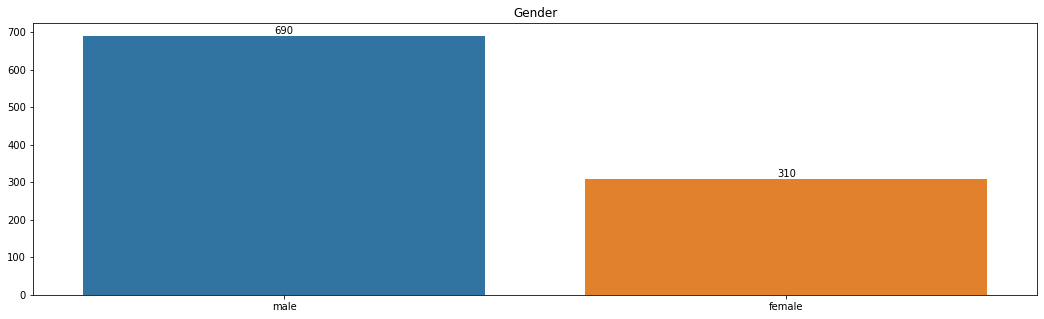

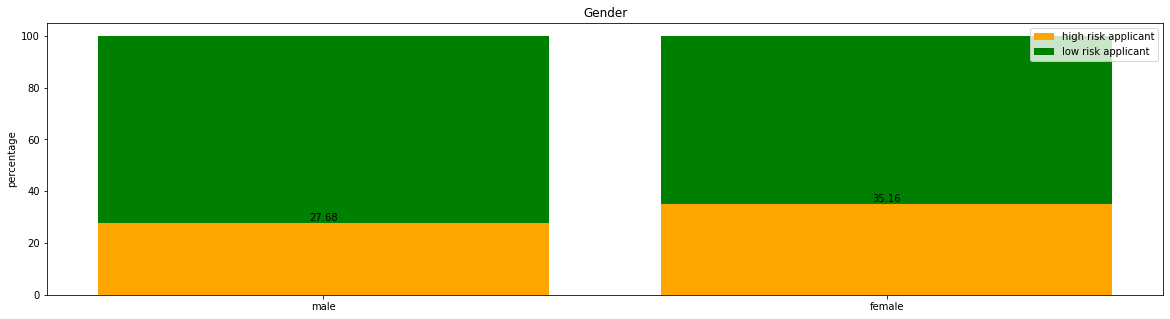

In [441]:
plot_categorical(data,categorical_features[6])

### Observations :

---> female has high chance to be high risk applicant then male

In [442]:
data.Gender.isna().sum()  # no null values

0

-------------------------------Marital_status------------------------------


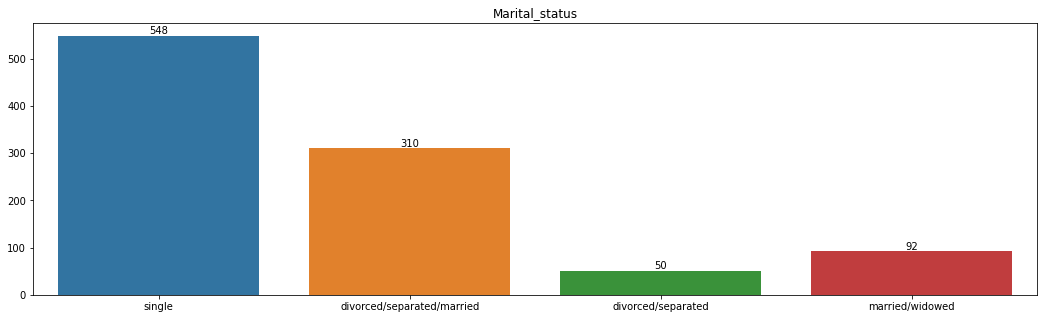

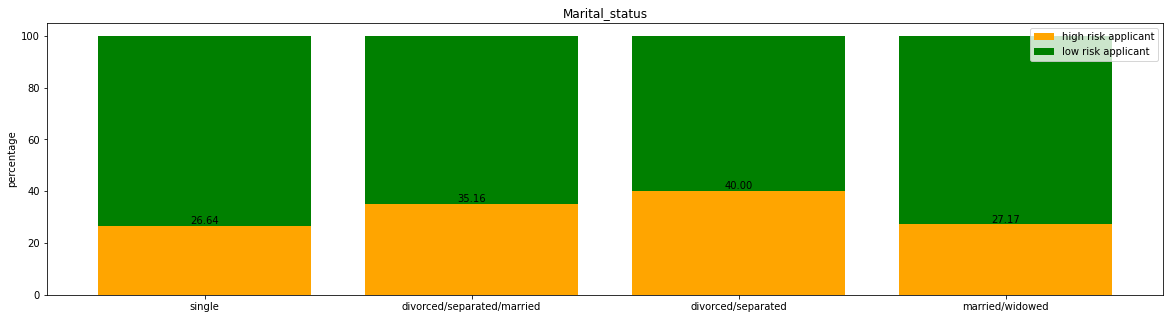

In [443]:
plot_categorical(data,categorical_features[7])

### Observations :

---> divorced/separated/married has high chance to be high risk applicant then married/single


In [444]:
data.Marital_status.isna().sum()  #no null values

0

----------------------------------Housing----------------------------------


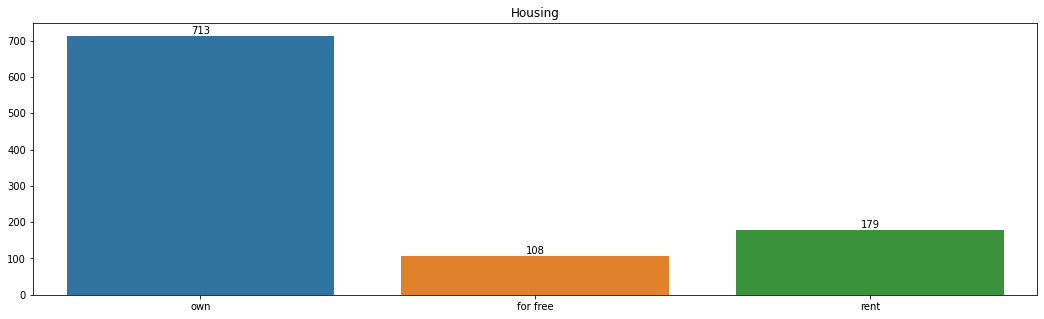

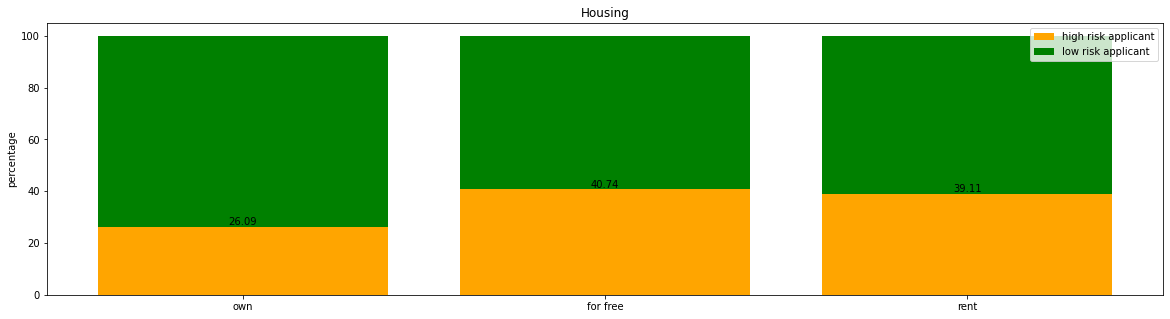

In [445]:
plot_categorical(data,categorical_features[8])

### Observations : 

---> free housing and rent house applicants has high chance to be high risk applicant

---> own house applicants , has low risk chance to be high risk applicant 

In [447]:
data.Housing.isna().sum()  #no null values

0

-----------------------------Employment_status-----------------------------


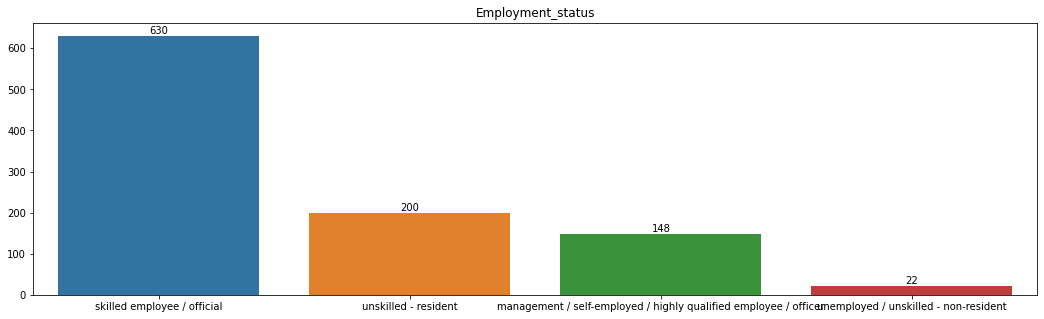

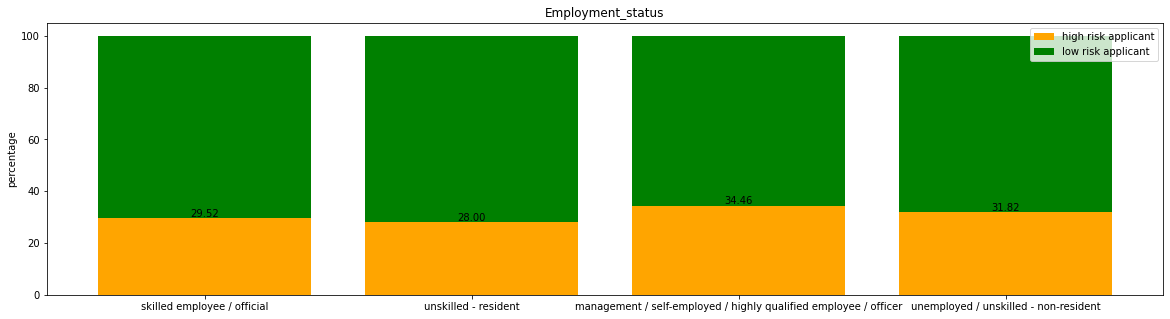

In [448]:
plot_categorical(data,categorical_features[9])

### Observation :

--->  not much informations to detect high risk applicant from appicants

In [450]:
data.Employment_status.isna().sum()  # No null values

0

In [451]:
#it is common to happen in real word ,so considering it as the Nan
data.Telephone.fillna('NaN',inplace=True)

---------------------------------Telephone---------------------------------


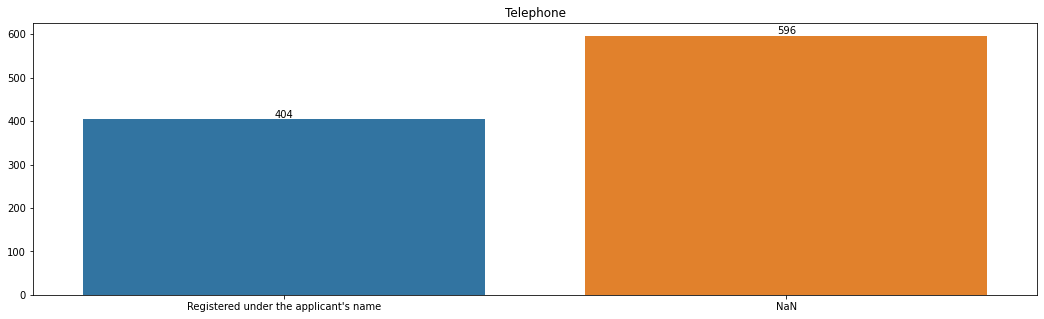

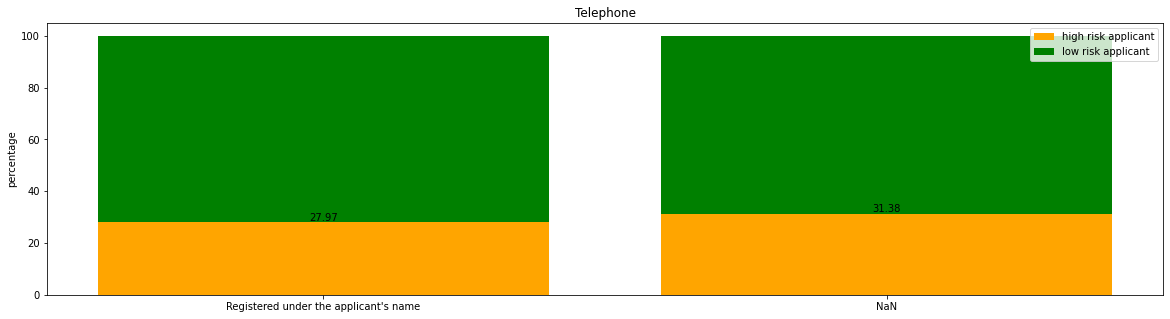

In [452]:
plot_categorical(data,categorical_features[10])

### Observation :

--->  not much informations to detect high risk applicant from appicants

-------------------------------Foreign_worker------------------------------


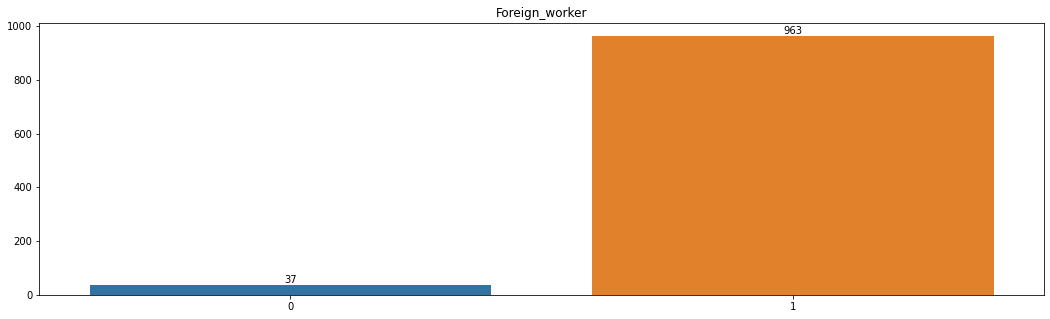

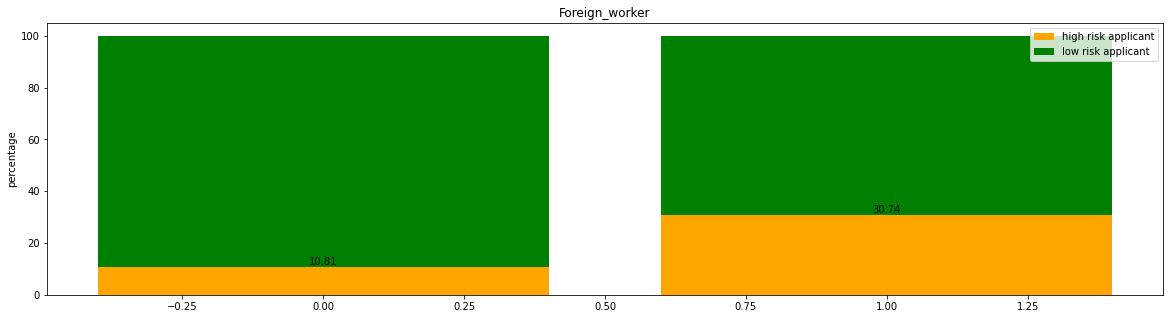

In [385]:
plot_categorical(data,categorical_features[11])

### Observations :
---> Foreign_worker applicant has high chance to be high risk applicant

In [386]:
data.Foreign_worker.isna().sum()  #no null values

0

--------------------------Savings_account_balance--------------------------


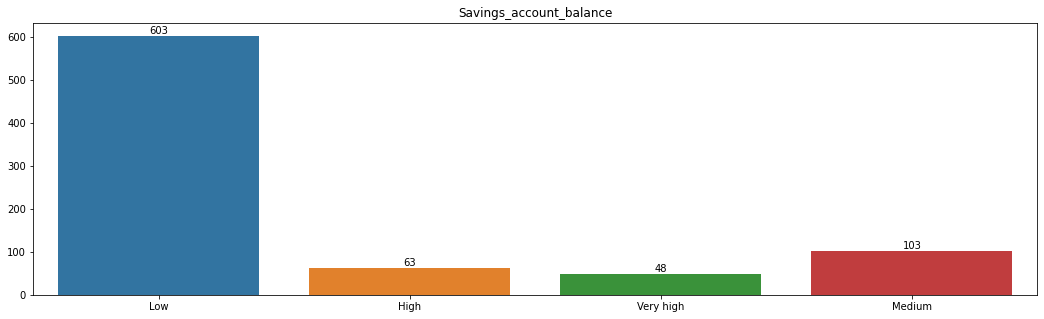

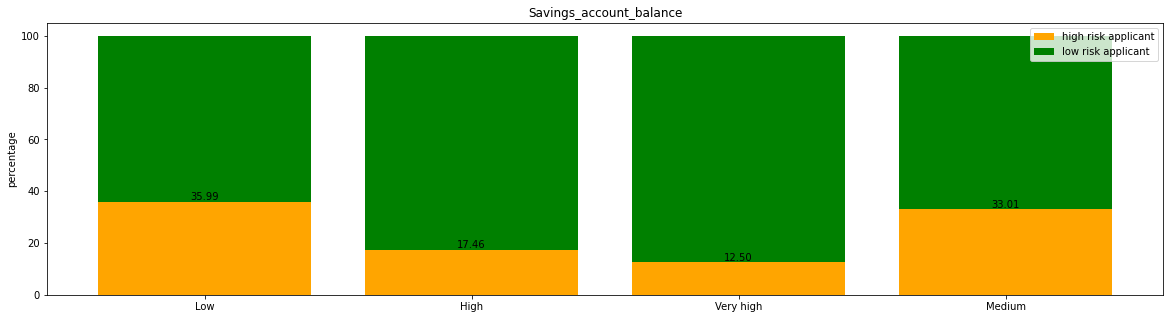

In [387]:
plot_categorical(data,categorical_features[12])

### Observation :

---> low balance applicant , has high chance to be high risk applicant

---> medium balance applicant, also has high chance ti be high risk applicant

---> very high and high saving account balance has low chance to be

In [388]:
data.Savings_account_balance.isna().sum()  #null values

183

----------Balance_in_existing_bank_account_(lower_limit_of_bucket)---------


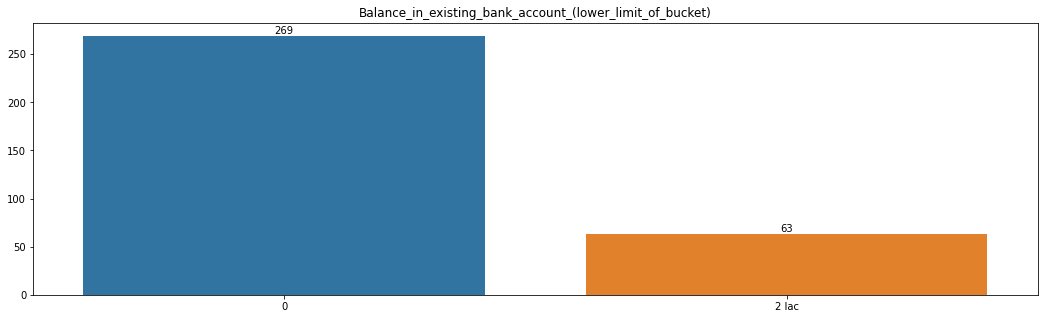

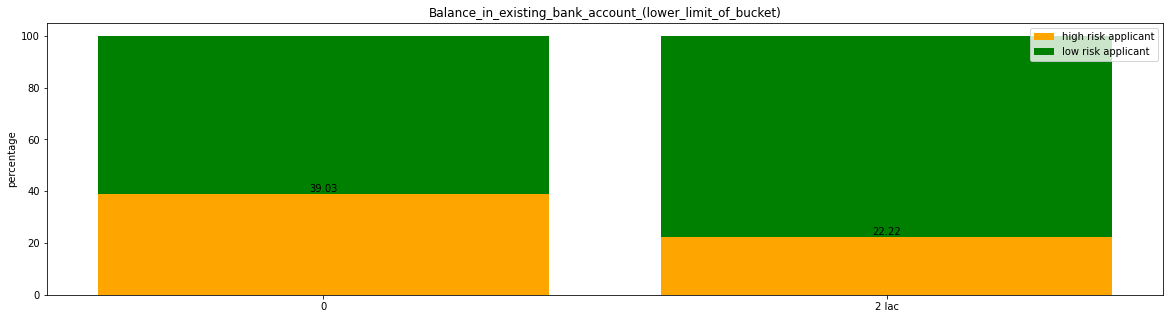

In [389]:
plot_categorical(data,categorical_features[13])

### Observations :
---> Balance_in_existing_bank_account_(lower_limit_of_bucket) having 0 , has high chance to be high risk applicant

In [454]:
data['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].isna().sum()  # #more number of nan values , so considering Nan as a category

668

----------Balance_in_existing_bank_account_(upper_limit_of_bucket)---------


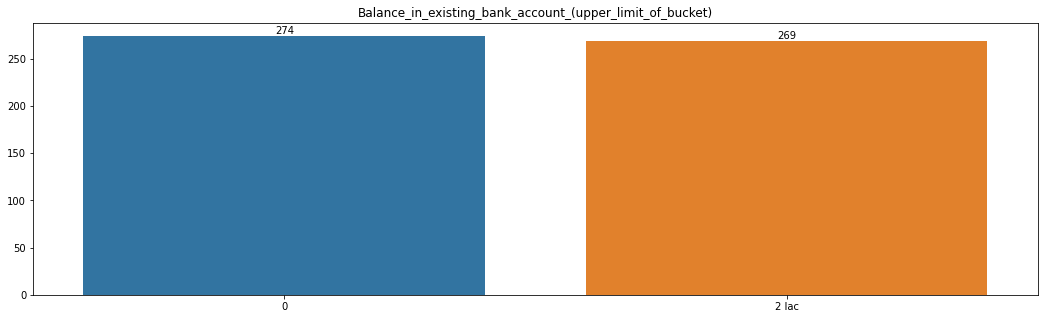

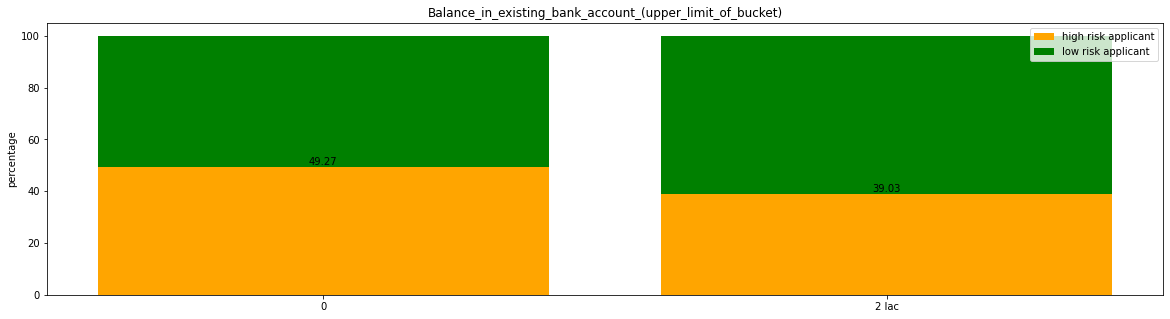

In [455]:
plot_categorical(data,categorical_features[14])

### Observations :
---> Balance_in_existing_bank_account_(lower_limit_of_bucket) having 0 , has high chance to be high risk applicant

In [456]:
data['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].isna().sum()  # more number of nan values , so considering Nan as a category

457

### important features by just observing plots :

Months_loan_taken_for \
Principal_loan_amount \
Primary_applicant_age_in_years \
Has_been_employed_for_at_least \
Has_been_employed_for_at_most \
Purpose \
Savings_account_balance \
Has_coapplicant \
Has_guarantor \
Gender \
Marital_status \
Housing \
Property \
Number_of_existing_loans_at_this_bank \
EMI_rate_in_percentage_of_disposable_income \
Foreign_worker \
Balance_in_existing_bank_account_(lower_limit_of_bucket) \
Balance_in_existing_bank_account_(upper_limit_of_bucket) \


### Not important :

Years_at_current_residence \
Number_of_dependents \
Other_EMI_plans \
Employment_status \
Telephone 


### wrong information or corrupted information :

Loan_history

### NaN values
Savings_account_balance \
Has_been_employed_for_at_least \
Has_been_employed_for_at_most \
Purpose \
Property